Follow this guide to select the correct conda environment\
https://stackoverflow.com/questions/66869413/visual-studio-code-does-not-detect-virtual-environments

In [1]:
import os
os.environ['NUMEXPR_MAX_THREADS'] = '128'

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
#print(sys.executable)
from importlib import reload

import os
import subprocess

import confidence_tools
import compare_aligned_confidence_probabilities

from IPython import display
from collections import defaultdict
import py3Dmol
import pandas as pd
pd.set_option('display.max_columns', None)

# import drawing library
#%matplotlib inline
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.text import Annotation
import seaborn as sns


In [3]:
# Software
MMalign_exe="/proj/berzelius-2021-29/users/x_arnel/bin/MMalign"

# CHANGE
id = "6e63_H_L_P_ab"
model_preset="multimer_v1"
suffix="baseline"


# Directories
tmp = "/proj/berzelius-2021-29/users/x_safro/tmp"
native_pdb = f"/proj/berzelius-2021-29/users/x_safro/git/ab-benchmark/data/native_pdbs/{id}.nat.chn.pdb"
path_scores = f"/proj/berzelius-2021-29/users/x_safro/git/ab-benchmark/data/scores_{suffix}_{model_preset}/{id}_{model_preset}_{suffix}_scores.csv"


# Model selection

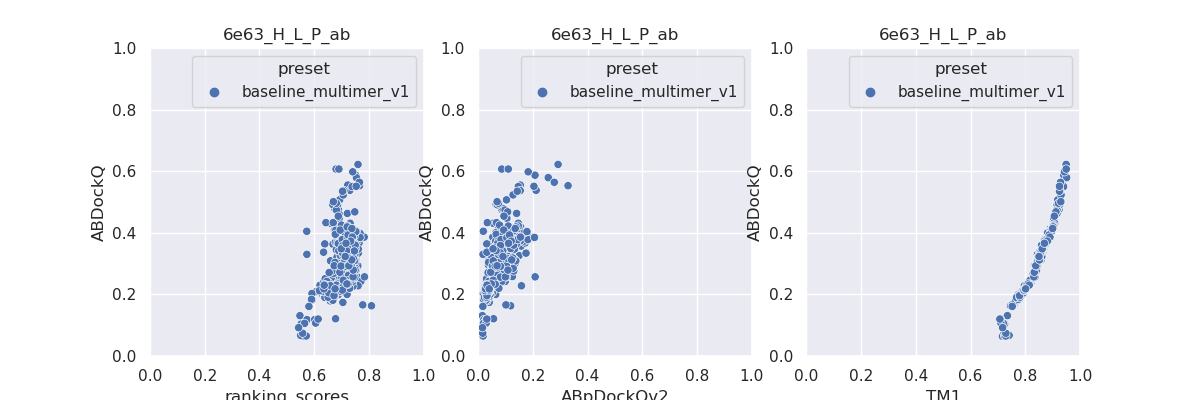

In [4]:

# Plot scores
sns.set_theme()

flags = ['ranking_scores','ABpDockQv2','TM1']

df_scores = pd.read_csv(path_scores, sep=',')
df_scores['preset'] = f"{suffix}_{model_preset}"

n_x_axis = len(flags)
y_axis = 'ABDockQ'
fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis*4, 1*4))
for i in range(n_x_axis):
    curr_ax = axes[i]
    sns.scatterplot(ax=curr_ax, data=df_scores,x=flags[i],y=y_axis, hue='preset', style='preset')
    curr_ax.set_title(f'{id}')
    curr_ax.set_xlim(0,1)
    curr_ax.set_ylim(0,1)
    #curr_ax.text(2/3, 0.5, f'corr={round(corr_df[flags[i]][y_axis],2)}', horizontalalignment='center', verticalalignment='center')


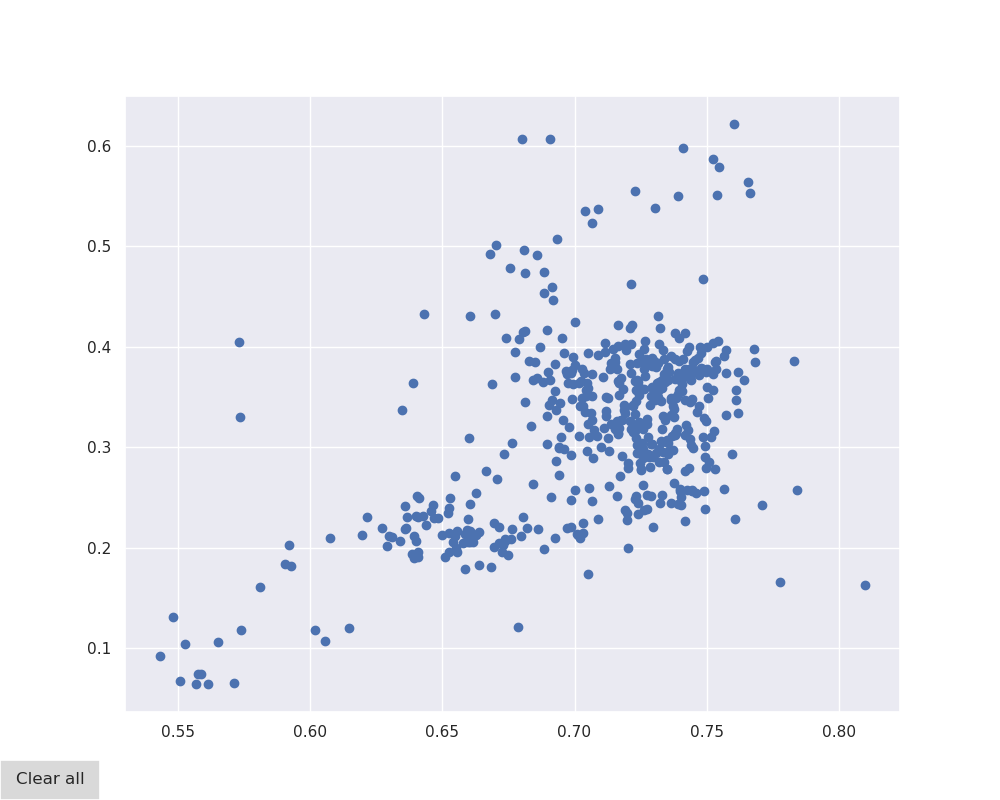

('unrelaxed_model_2_multimer_baseline_1', 'unrelaxed_model_5_multimer_baseline_79')
('unrelaxed_model_5_multimer_baseline_79', 'unrelaxed_model_4_multimer_baseline_3')


In [5]:

axis_values_x = df_scores['ranking_scores']
axis_values_y = df_scores['ABDockQ']
labels= df_scores['MODELNAME']

label_selection =(labels[0],labels[1])


# Set style
sns.set()

# draw a scatter-plot of the generated values
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot()
#ax.set_xlim((0,1))
#ax.set_ylim((0,1))

# extract the scatterplot drawing in a separate function so we ca re-use the code
def draw_scatterplot():
    ax.scatter(
        axis_values_x,
        axis_values_y,
        #c=instances_colors,
        picker=True,

    )


# draw the initial scatterplot
draw_scatterplot()


# create and add an annotation object (a text label)
def annotate(axis, text, x, y):
    text_annotation = Annotation(text, xy=(x, y), xycoords='data')
    axis.add_artist(text_annotation)
    print(label_selection)


# define the behaviour -> what happens when you pick a dot on the scatterplot by clicking close to it
def onpick(event):
    if event.mouseevent.dblclick:   # Only react if using double clicked
        # step 1: take the index of the dot which was picked
        ind = event.ind

        # step 2: save the actual coordinates of the click, so we can position the text label properly
        label_pos_x = event.mouseevent.xdata
        label_pos_y = event.mouseevent.ydata

        # just in case two dots are very close, this offset will help the labels not appear one on top of each other
        offset = 0

        # if the dots are to close one to another, a list of dots clicked is returned by the matplotlib library
        for j,i in enumerate(ind):
            # step 3: take the label for the corresponding instance of the data
            label = labels[i]

            # update label selection
            if j==0:
                global label_selection
                label_selection=(label_selection[1],label)

            # step 4: log it for debugging purposes
            #print "index", i, label

            # step 5: create and add the text annotation to the scatterplot
            annotate(
                ax,
                label,
                label_pos_x + offset,
                label_pos_y + offset
            )

            # step 6: force re-draw
            ax.figure.canvas.draw_idle()

            # alter the offset just in case there are more than one dots affected by the click
            offset += 0.01

# connect the click handler function to the scatterplot
fig.canvas.mpl_connect('pick_event', onpick)

# create the "clear all" button, and place it somewhere on the screen
ax_clear_all = plt.axes([0.0, 0.0, 0.1, 0.05])
button_clear_all = Button(ax_clear_all, 'Clear all')

# define the "clear all" behaviour
def onclick(event):
    # step 1: we clear all artist object of the scatter plot
    ax.cla()

    # step 2: we re-populate the scatterplot only with the dots not the labels
    draw_scatterplot()

    # step 3: we force re-draw
    ax.figure.canvas.draw_idle()


# link the event handler function to the click event on the button
button_clear_all.on_clicked(onclick)

# initial drawing of the scatterplot
plt.plot()
#print "scatterplot done"

# present the scatterplot
plt.show()
